In [241]:
import pandas as pd
import numpy as np

In [242]:
from sklearn.compose import make_column_selector

In [243]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

In [292]:
test1 = pd.read_csv('test.csv')

In [244]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [293]:
test1.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [245]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [246]:
traintest = pd.concat([train.drop('SalePrice', axis =1),test], axis = 0)

In [247]:
pd.set_option('display.max_columns', 300)

In [248]:
cat_sel = make_column_selector(dtype_include=object)
num_sel = make_column_selector(dtype_include='number')
num_col = num_sel(traintest)
cat_col = cat_sel(traintest)

In [249]:
train_cleaning = train.drop("SalePrice", axis =1).copy()
test_cleaning = test.copy()
train_test = pd.concat([train.drop("SalePrice", axis =1), test])
missing_values = pd.concat([train_test.isnull().sum().sort_values(ascending = False), 
                           train_test.isnull().sum().sort_values(ascending = False).apply(lambda x: (x/train_test.shape[0])*100)],axis = 1, keys= ['Values_missing', 'Percent_of_missing'])
missing_values[missing_values['Values_missing']>0]

,Values_missing,Percent_of_missing
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


In [250]:
cat_col = cat_sel(train_cleaning)

In [251]:
replace_zero = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'GarageCars', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF2']
replace_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'Exterior2nd', 'Exterior1st']
replace_mode = ['Functional', 'Utilities', 'KitchenQual', 'SaleType', 'Electrical']

In [252]:
train_cleaning[replace_zero] = train_cleaning[replace_zero].fillna(0)
train_cleaning[replace_none] = train_cleaning[replace_none].fillna('None')

for col_name in replace_mode:
    train_cleaning[col_name].replace(np.nan, train_cleaning[col_name].mode()[0], inplace = True)

test_cleaning.MSZoning = test_cleaning.groupby("MSSubClass")['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))

test_cleaning[replace_zero] = test_cleaning[replace_zero].fillna(0)

test_cleaning[replace_none] = test_cleaning[replace_none].fillna('None')

for col_name in replace_mode:
    test_cleaning[col_name].replace(np.nan, train_cleaning[col_name].mode()[0], inplace = True)

In [253]:
test_cleaning.isnull().sum().sum()

0

In [254]:
test_cleaning.loc[1150, 'MasVnrType'] = "BrkFace"
train_cleaning.loc[332, 'BsmtFinType2'] = "Unf"
train_cleaning.loc[948,"BsmtExposure"] = "No"
test_cleaning.loc[691, ["Exterior1st", "Exterior2nd"]] = "Wd Sdng"
test_cleaning.loc[1013,"Functional"] = "Maj1"
test_cleaning.loc[756, "Functional"] = "Typ"
test_cleaning.loc[790, "MSZoning"] = 'RL'
test_cleaning.loc[[725,1064,580], "BsmtCond"] = "TA"
test_cleaning.loc[666, "GarageYrBlt"] = 1950
test_cleaning.loc[1116,"GarageType"] = "NA"
test_cleaning.loc[[960,1043,1139], "PoolQC"] = "Gd"


In [255]:
train_cleaning['Exterior2nd'].replace('Wd Shng','WdShing',inplace =True)
train_cleaning['Exterior2nd'].replace('Brk Cmn','BrkComm',inplace =True)
test_cleaning['Exterior2nd'].replace('Wd Shng','WdShing',inplace =True)
test_cleaning['Exterior2nd'].replace('Brk Cmn','BrkComm',inplace =True)

In [256]:
neigh_map = {'MeadowV': 1, 
             'IDOTRR': 1, 
             'BrDale': 1,
             'BrkSide': 2,
             'OldTown': 2,
             'Edwards': 2,
             'Sawyer': 3,
             'Blueste': 3,
             'SWISU': 3,
             'NPkVill': 3,
             'NAmes': 3,
             'Mitchel': 4,
             'SawyerW': 5,
             'NWAmes': 5,
             'Gilbert': 5,
             'Blmngtn': 5,
             'CollgCr': 5,
             'ClearCr': 6,
             'Crawfor': 6,
             'Veenker': 7,
             'Somerst': 7,
             'Timber': 8,
             'StoneBr': 9,
             'NridgHt': 10,
             'NoRidge': 10}
train_cleaning["Neighborhood"] = train_cleaning['Neighborhood'].map(neigh_map)
test_cleaning['Neighborhood'] = test_cleaning['Neighborhood'].map(neigh_map)

test_cleaning['Exterior2nd'] = test_cleaning['Exterior2nd'].apply(lambda x:"BrkComm" if (x == "Brk Cmn") else "CemntBd" if (x == 'CmentBd') else x)
train_cleaning['Exterior2nd'] = train_cleaning['Exterior2nd'].apply(lambda x: 'BrkComm' if (x == 'Brk Cmn') else 'CemntBd' if (x == 'CmentBd') else x)

train_cleaning['ExteriorSame'] = (train_cleaning["Exterior1st"] == train_cleaning['Exterior2nd']).apply(lambda x:1 if x == True else 0)
test_cleaning['ExteriorSame'] = (test_cleaning['Exterior1st'] == test_cleaning['Exterior2nd']).apply(lambda x:1 if x ==True else 0)

ext1_map = {'None': 0, 
            'BrkComm': 1, 
            'AsphShn': 2,
            'CBlock': 2,
            'AsbShng': 3,
            'WdShing': 4,
            'Wd Sdng': 5,
            'MetalSd': 5,
            'Stucco': 6,
            'HdBoard': 7,
            'BrkFace': 8,
            'Plywood': 8,
            'VinylSd': 9,
            'CemntBd': 10,
            'Stone': 11,
            'ImStucc': 12}
train_cleaning['Exterior1st'] = train_cleaning['Exterior1st'].map(ext1_map) 
test_cleaning['Exterior1st'] = test_cleaning['Exterior1st'].map(ext1_map) 

ext2_map = {'None': 0, 
            'BrkComm': 4, 
            'AsphShn': 3,
            'CBlock': 1,
            'AsbShng': 2,
            'WdShing': 4,
            'Wd Sdng': 3,
            'Wd Shng': 3,
            'MetalSd': 3,
            'Stucco': 4,
            'HdBoard': 5,
            'BrkFace': 6,
            'Plywood': 6,
            'VinylSd': 9,
            'CemntBd': 10,
            'Stone': 7,
            'ImStucc': 8,
            'Other': 11}
train_cleaning['Exterior2nd'] = train_cleaning['Exterior2nd'].map(ext2_map) 
test_cleaning['Exterior2nd'] = test_cleaning['Exterior2nd'].map(ext2_map) 

In [257]:
qual_map = {'None': 0, 
            "Na":0,
            'Po': 1, 
            'Fa': 2, 
            'TA': 3, 
            'Gd': 4, 
            'Ex': 5}


train_cleaning['ExterQual'] = train_cleaning['ExterQual'].map(qual_map).astype('int')
test_cleaning['ExterQual'] = test_cleaning['ExterQual'].map(qual_map).astype('int')

train_cleaning['ExterCond'] = train_cleaning['ExterCond'].map(qual_map).astype('int')
test_cleaning['ExterCond'] = test_cleaning['ExterCond'].map(qual_map).astype('int')

train_cleaning['BsmtQual'] = train_cleaning['BsmtQual'].map(qual_map).astype('int')
test_cleaning['BsmtQual'] = test_cleaning['BsmtQual'].map(qual_map).astype('int')

train_cleaning['BsmtCond'] = train_cleaning['BsmtCond'].map(qual_map).astype('int')
test_cleaning['BsmtCond'] = test_cleaning['BsmtCond'].map(qual_map).astype('int')

train_cleaning['HeatingQC'] = train_cleaning['HeatingQC'].map(qual_map).astype('int')
test_cleaning['HeatingQC'] = test_cleaning['HeatingQC'].map(qual_map).astype('int')

train_cleaning['KitchenQual'] = train_cleaning['KitchenQual'].map(qual_map).astype('int')
test_cleaning['KitchenQual'] = test_cleaning['KitchenQual'].map(qual_map).astype('int')

train_cleaning['FireplaceQu'] = train_cleaning['FireplaceQu'].map(qual_map).astype('int')
test_cleaning['FireplaceQu'] = test_cleaning['FireplaceQu'].map(qual_map).astype('int')

train_cleaning['GarageQual'] = train_cleaning['GarageQual'].map(qual_map).astype('int')
test_cleaning['GarageQual'] = test_cleaning['GarageQual'].map(qual_map).astype('int')

train_cleaning['GarageCond'] = train_cleaning['GarageCond'].map(qual_map).astype('int')
test_cleaning['GarageCond'] = test_cleaning['GarageCond'].map(qual_map).astype('int')

bsmtexposure_map = {'None': 0, 
                    'No': 1, 
                    'Mn': 2, 
                    'Av': 3, 
                    'Gd': 4}

train_cleaning['BsmtExposure'] = train_cleaning['BsmtExposure'].map(bsmtexposure_map).astype('int')
test_cleaning['BsmtExposure'] = test_cleaning['BsmtExposure'].map(bsmtexposure_map).astype('int')

fence_map = {'None': 0, 
             'MnWw': 1, 
             'GdWo': 2, 
             'MnPrv': 3, 
             'GdPrv': 4}

train_cleaning['Fence'] = train_cleaning['Fence'].map(fence_map).astype('int')
test_cleaning['Fence'] = test_cleaning['Fence'].map(fence_map).astype('int')

bsmf_map = {'None': 0,
            'Unf': 1,
            'LwQ': 2,
            'Rec': 3,
            'BLQ': 4,
            'ALQ': 5,
            'GLQ': 6}
train_cleaning['BsmtFinType1'] = train_cleaning['BsmtFinType1'].map(bsmf_map).astype('int')
test_cleaning['BsmtFinType1']  = test_cleaning['BsmtFinType1'].map(bsmf_map).astype('int')
train_cleaning['BsmtFinType2'] = train_cleaning['BsmtFinType2'].map(bsmf_map).astype('int')
test_cleaning['BsmtFinType2'] = test_cleaning['BsmtFinType2'].map(bsmf_map).astype('int')

garagef_map = {'None': 0,
               'Unf': 1,
               'RFn': 2,
               'Fin': 3}
train_cleaning['GarageFinish'] = train_cleaning['GarageFinish'].map(garagef_map).astype('int')
test_cleaning['GarageFinish'] = test_cleaning['GarageFinish'].map(garagef_map).astype('int')

poolqc_map = {'None': 0, 
              'Fa': 2, 
              'TA': 3, 
              'Gd': 4, 
              'Ex': 5}
train_cleaning['PoolQC'] = train_cleaning['PoolQC'].map(poolqc_map).astype('int')
test_cleaning['PoolQC'] = test_cleaning['PoolQC'].map(poolqc_map).astype('int')

str_all_map = {'None': 0, 
               'Grvl': 1, 
               'Pave': 2}
train_cleaning['Street'] = train_cleaning['Street'].map(str_all_map).astype('int')
test_cleaning['Street'] = test_cleaning['Street'].map(str_all_map).astype('int')
train_cleaning['Alley'] = train_cleaning['Alley'].map(str_all_map).astype('int')
test_cleaning['Alley'] = test_cleaning['Alley'].map(str_all_map).astype('int')

cent_air_map = {'N': 0, 
                'Y': 1}
train_cleaning['CentralAir'] = train_cleaning['CentralAir'].map(cent_air_map).astype('int')
test_cleaning['CentralAir'] = test_cleaning['CentralAir'].map(cent_air_map).astype('int')

pave_drive_map = {'N': 0, 
                  'P': 1,
                  'Y': 2}
train_cleaning['PavedDrive'] = train_cleaning['PavedDrive'].map(pave_drive_map).astype('int')
test_cleaning['PavedDrive'] = test_cleaning['PavedDrive'].map(pave_drive_map).astype('int')

In [258]:
missing_val = pd.DataFrame()
missing_val['miss_val'] = test_cleaning.isna().sum()
missing_val[missing_val.miss_val>0]

,miss_val


In [259]:
train_cleaning.PavedDrive.unique()

array([2, 0, 1])

In [260]:
def plot_grid(data, fig_size, grid_size, plot_type, target = ""):
    fig = plt.figure(figsize = fig_size)
    
    if plot_type =='histplot':
        for i,column_name in enumerate(data.select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1],i+1)
            plot = sns.histplot(data[column_name], kde = True, color = 'red', stat = 'count')
            plot.set_xlabel(column_name, fontsize =16)
    
    if plot_type == 'boxplot':
        for i, column_name in enumerate (data.select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i+1)
            plot = sns.boxplot(x = data[column_name], color = 'red')
            plot.set_xlabel(column_name,fontsize = 16)
    if plot_type == 'scatterplot':
        for i, column_name in enumerate (data.drop(target, axis = 1).select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.scatterplot(x= data[column_name], y = data[target], color= 'red')
            plot.set_xlabel(column_name, fontsize =16)
    if plot_type == 'boxplot_cat':
        for i, column_name in enumerate(data.select_dtypes(include = 'object').columns):
            fig.add_subplot(grid_soze[0], grid_size[1], i+1)
            sort = data.groupby([column_name])[target].median().sort_values(ascending = False)
            plot = sns.boxplot(x = data[column_name], y =data[target], order = sort.index, palette = 'Reds')
            plot.set_xlabel(column_name, fontsize = 16)
            
        plt.tight_layout()

ValueError: num must be 1 <= num <= 36, not 37

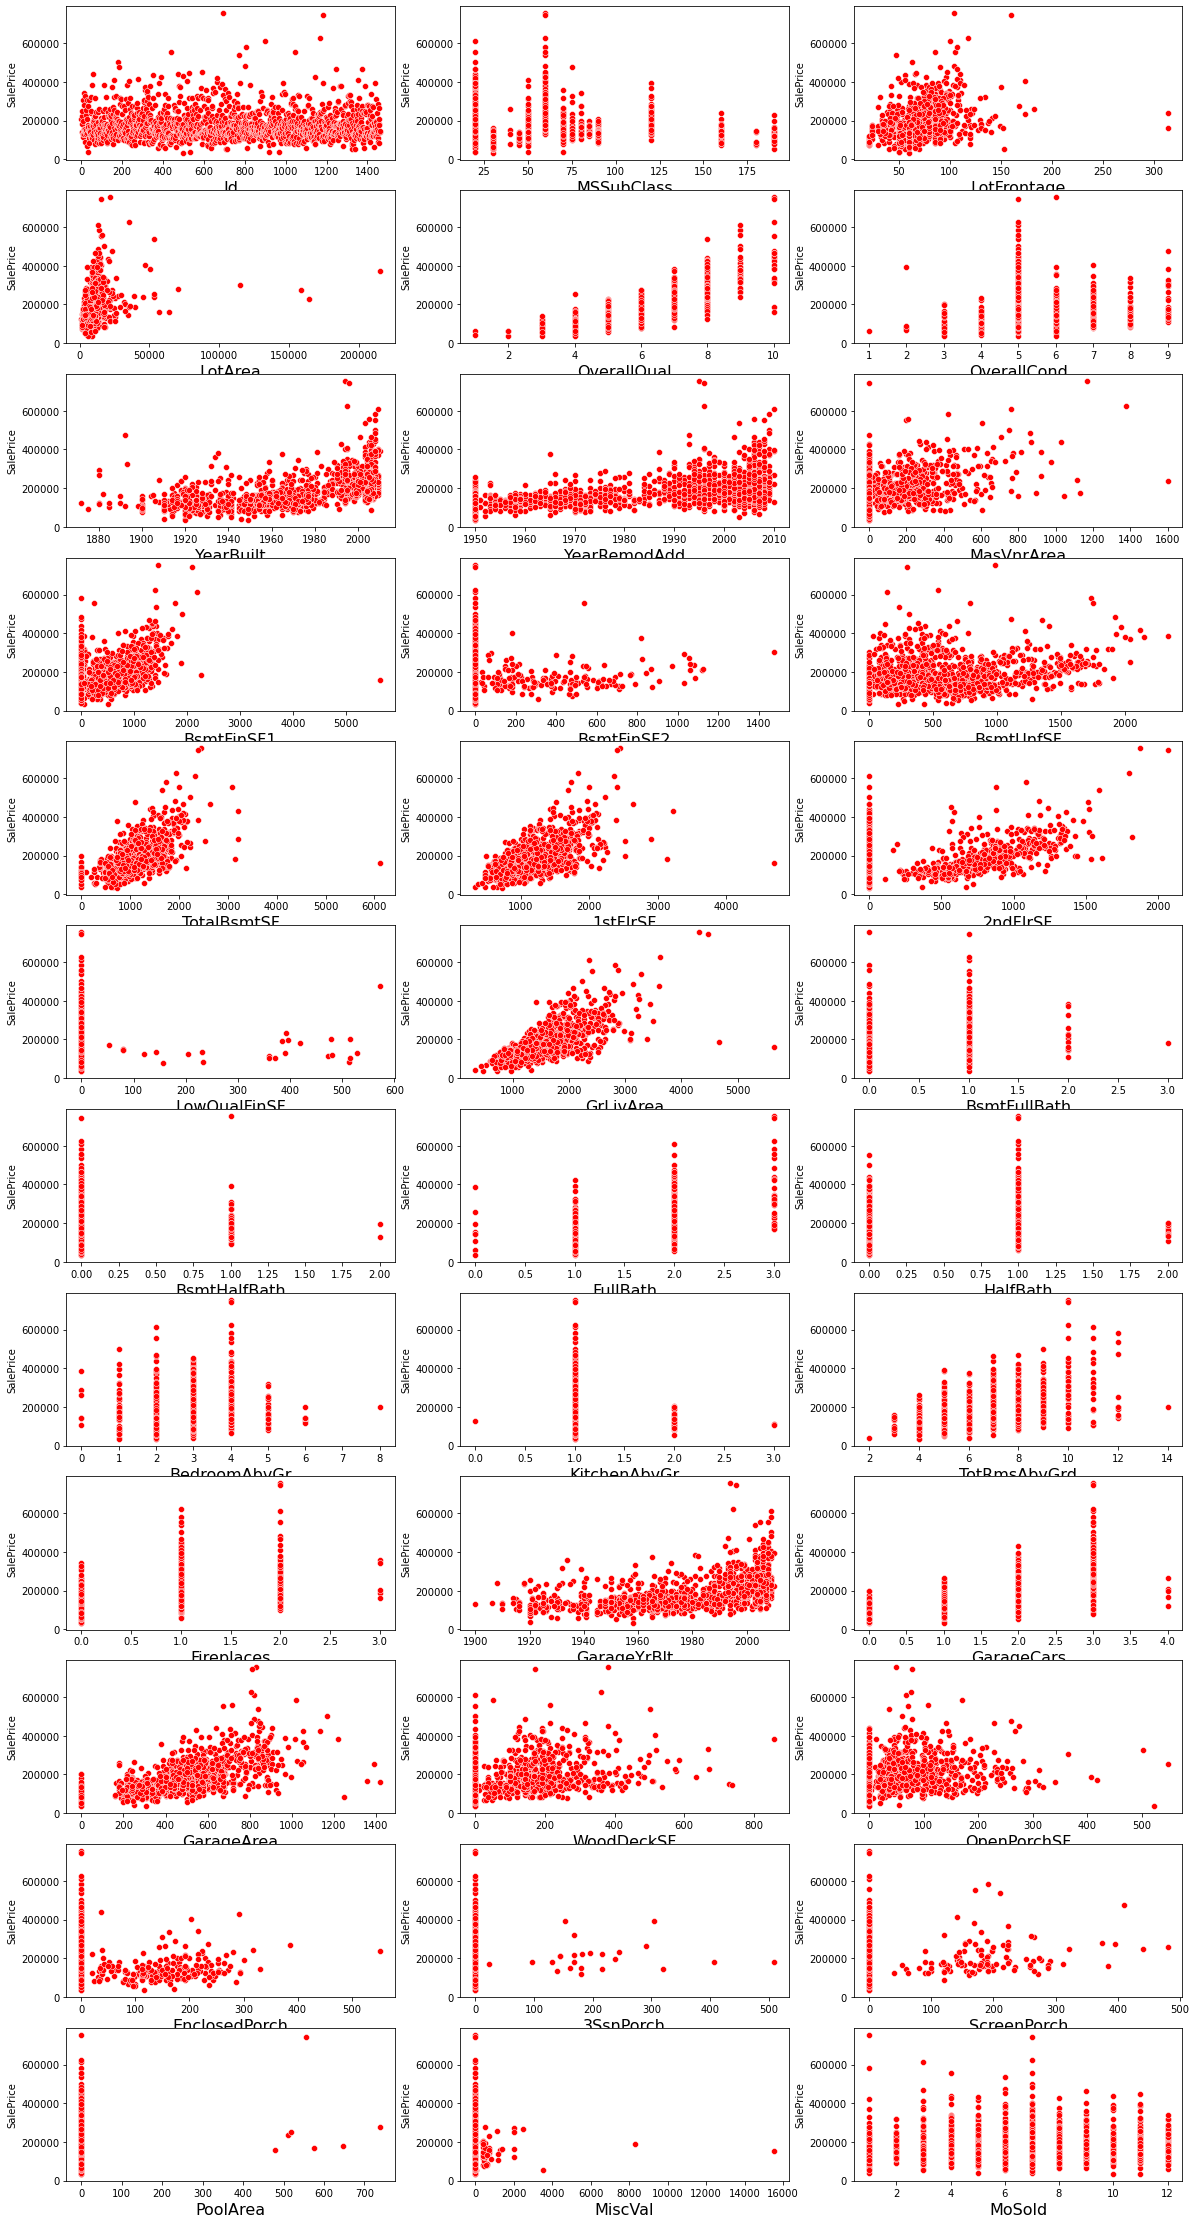

In [261]:
plot_grid(train, fig_size = (20,40), grid_size = (12,3), plot_type = 'scatterplot', target = 'SalePrice')

In [ ]:
plot_grid(train.drop('SalePrice', axis = 1), fig_size = (20, 40), grid_size = (12, 3), plot_type = 'histplot')

In [ ]:
plot_grid(train.drop('SalePrice', axis = 1), fig_size = (20, 40), grid_size = (12, 3), plot_type = 'boxplot')

In [262]:
def get_outliers(X_y, cols):
    outliers_index = []
    for col in cols:
        right_outliers = X_y[col][(X_y[col] - X_y[col].mean())
                                 /X_y[col].std()>3]
        left_outliers = X_y[col][(X_y[col] - X_y[col].mean())
                                /X_y[col].std()<-3]
        all_outliers = right_outliers.append(left_outliers)
        outliers_index +=(list(all_outliers.index))
        print('{} right outliers:\n{}\n{} left outliers:\n {} \n {} has TOTAL {} rows of outliers\n'.format(col, right_outliers, col, left_outliers, col, all_outliers.count()))
    outliers_index = list(set(outliers_index))
    
    print("There are{} unique rows with outliers in dataset". format(len(outliers_index)))
    return outliers_index

In [263]:
target = train.SalePrice.copy()

In [264]:
cols = num_col
X_y = pd.concat([train_cleaning, target], axis = 1)
outliers_index = get_outliers(X_y, cols)

Id right outliers:
Series([], Name: Id, dtype: int64)
Id left outliers:
 Series([], Name: Id, dtype: int64) 
 Id has TOTAL 0 rows of outliers

MSSubClass right outliers:
9       190
48      190
93      190
125     190
165     190
246     190
291     190
300     190
312     190
335     190
411     190
488     190
520     190
535     190
635     190
637     190
703     190
705     190
713     190
861     190
969     190
985     190
1030    190
1062    190
1144    190
1186    190
1190    190
1266    190
1393    190
1416    190
Name: MSSubClass, dtype: int64
MSSubClass left outliers:
 Series([], Name: MSSubClass, dtype: int64) 
 MSSubClass has TOTAL 30 rows of outliers

LotFrontage right outliers:
197     174.0
231     174.0
934     313.0
1107    168.0
1127    182.0
1298    313.0
Name: LotFrontage, dtype: float64
LotFrontage left outliers:
 Series([], Name: LotFrontage, dtype: float64) 
 LotFrontage has TOTAL 6 rows of outliers

LotArea right outliers:
53       50271
249     159000
313    

In [265]:
X_y.isna().sum().sum()

0

In [266]:
#GrLivArea(1298, 523), MiscVal(346, 1230) TotalBsmtSF(1298) MasVnrArea(297) LotArea 335 LotFrontage 934


In [267]:
X_y.drop([1298, 523,346,1230,297, 335 , 934],axis = 0,inplace = True)

In [268]:
train_cleaning = X_y.drop('SalePrice', axis = 1).copy()
target_cleaned = X_y.SalePrice

In [269]:
X_y.isna().sum().sum()

0

In [270]:
train_test = pd.concat([train_cleaning, test_cleaning], keys = ['train', 'test'], axis = 0)

train_test['TotalPorchSF'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] + 
                              train_test['EnclosedPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF'])

train_test['TotalSF'] = (train_test['BsmtFinSF1'] + train_test['BsmtFinSF2'] + 
                         train_test['1stFlrSF'] + train_test['2ndFlrSF'] + 
                         train_test['TotalPorchSF'])

train_test['TotalBathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) + 
                                train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test['TotalRms'] = (train_test['TotRmsAbvGrd'] + train_test['TotalBathrooms'])

train_test['YearSold'] = ((train_test['MoSold'] / 12) + train_test['YrSold']).astype('int')

train_test['YearsAfterB'] = (train_test['YearSold'] - train_test['YearBuilt'])

train_test['YearsAfterR'] = (train_test['YearSold'] - train_test['YearRemodAdd'])
    
# Merging quality and conditions

train_test['TotalExtQual'] = (train_test['ExterQual'] + train_test['ExterCond'])

train_test['TotalBsmtQual'] = (train_test['BsmtQual'] + train_test['BsmtCond'] + 
                               train_test['BsmtFinType1'] + train_test['BsmtFinType2'] + train_test['BsmtExposure'])

train_test['TotalGrgQual'] = (train_test['GarageQual'] + train_test['GarageCond'] + train_test['GarageFinish'])

# train_test['TotalPaved'] = (train_test['Street'] + train_test['Alley'] + train_test['PavedDrive'])

train_test['TotalQual'] = (train_test['OverallQual'] + train_test['OverallCond'] + 
                           train_test['TotalExtQual'] + train_test['TotalBsmtQual'] + 
                           train_test['TotalGrgQual'] + train_test['KitchenQual'] + train_test['HeatingQC'] + 
                           train_test['FireplaceQu'] + train_test['PoolQC'] + train_test['Fence'] + 
                           train_test['CentralAir'])

# Creating new features by using new quality indicators

train_test['QualGr'] = train_test['TotalQual'] * train_test['GrLivArea']

train_test['QualBsm'] = train_test['TotalBsmtQual'] * (train_test['BsmtFinSF1'] + train_test['BsmtFinSF2'])

train_test['QualPorch'] = train_test['TotalExtQual'] * train_test['TotalPorchSF']

train_test['QualExt'] = (train_test['TotalExtQual'] * 
                        (train_test['Exterior1st'] + train_test['Exterior2nd']) * train_test['MasVnrArea'])

train_test['QualGrg'] = train_test['TotalGrgQual'] * train_test['GarageArea']

train_test['QualFirepl'] = train_test['FireplaceQu'] * train_test['Fireplaces']

train_test['QlLivArea'] = (train_test['GrLivArea'] - train_test['LowQualFinSF']) * (train_test['TotalQual'])

train_test['QualSFNg'] = train_test['QualGr'] * train_test['Neighborhood']

train_test['QualSF'] = train_test['TotalQual'] * train_test['TotalSF']
train_test['QlSF'] = (train_test['TotalSF'] - train_test['LowQualFinSF']) * (train_test['TotalQual'])
train_test['QualSFNg2'] = (train_test['QualGr'] + train_test['QualSF']) * train_test['Neighborhood']
train_test['QualGrgNg'] = train_test['QualGrg'] * train_test['Neighborhood']

In [271]:
train_test['HasPool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_test['Has2ndFloor'] = train_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_test['HasGarage'] = train_test['QualGrg'].apply(lambda x: 1 if x > 0 else 0)
train_test['HasBsmt'] = train_test['QualBsm'].apply(lambda x: 1 if x > 0 else 0)
train_test['HasFireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_test['HasPorch'] = train_test['QualPorch'].apply(lambda x: 1 if x > 0 else 0)
train_test['HasLotFr'] = train_test['LotFrontage'].apply(lambda x: 1 if x > 0 else 0)
train_test['HasFence'] = train_test['Fence'].apply(lambda x: 1 if x > 0 else 0)
train_test['WasRemod'] = (train_test['YearRemodAdd'] != train_test['YearBuilt']).apply(lambda x: 1 if x == True else 0)

In [272]:
train_test.isna().sum().sum()

0

In [273]:
to_drop = [
    'Utilities',
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtFinType2',
    'BsmtQual',
    'GarageQual',
    'GarageFinish',
    'KitchenQual',
    'HeatingQC',
    'FireplaceQu',
    'YearSold',
    'MiscVal',
    'MiscFeature',
    'Alley',
    'PoolArea',
    'LowQualFinSF',
]
train_test.drop(columns = to_drop, inplace=True)

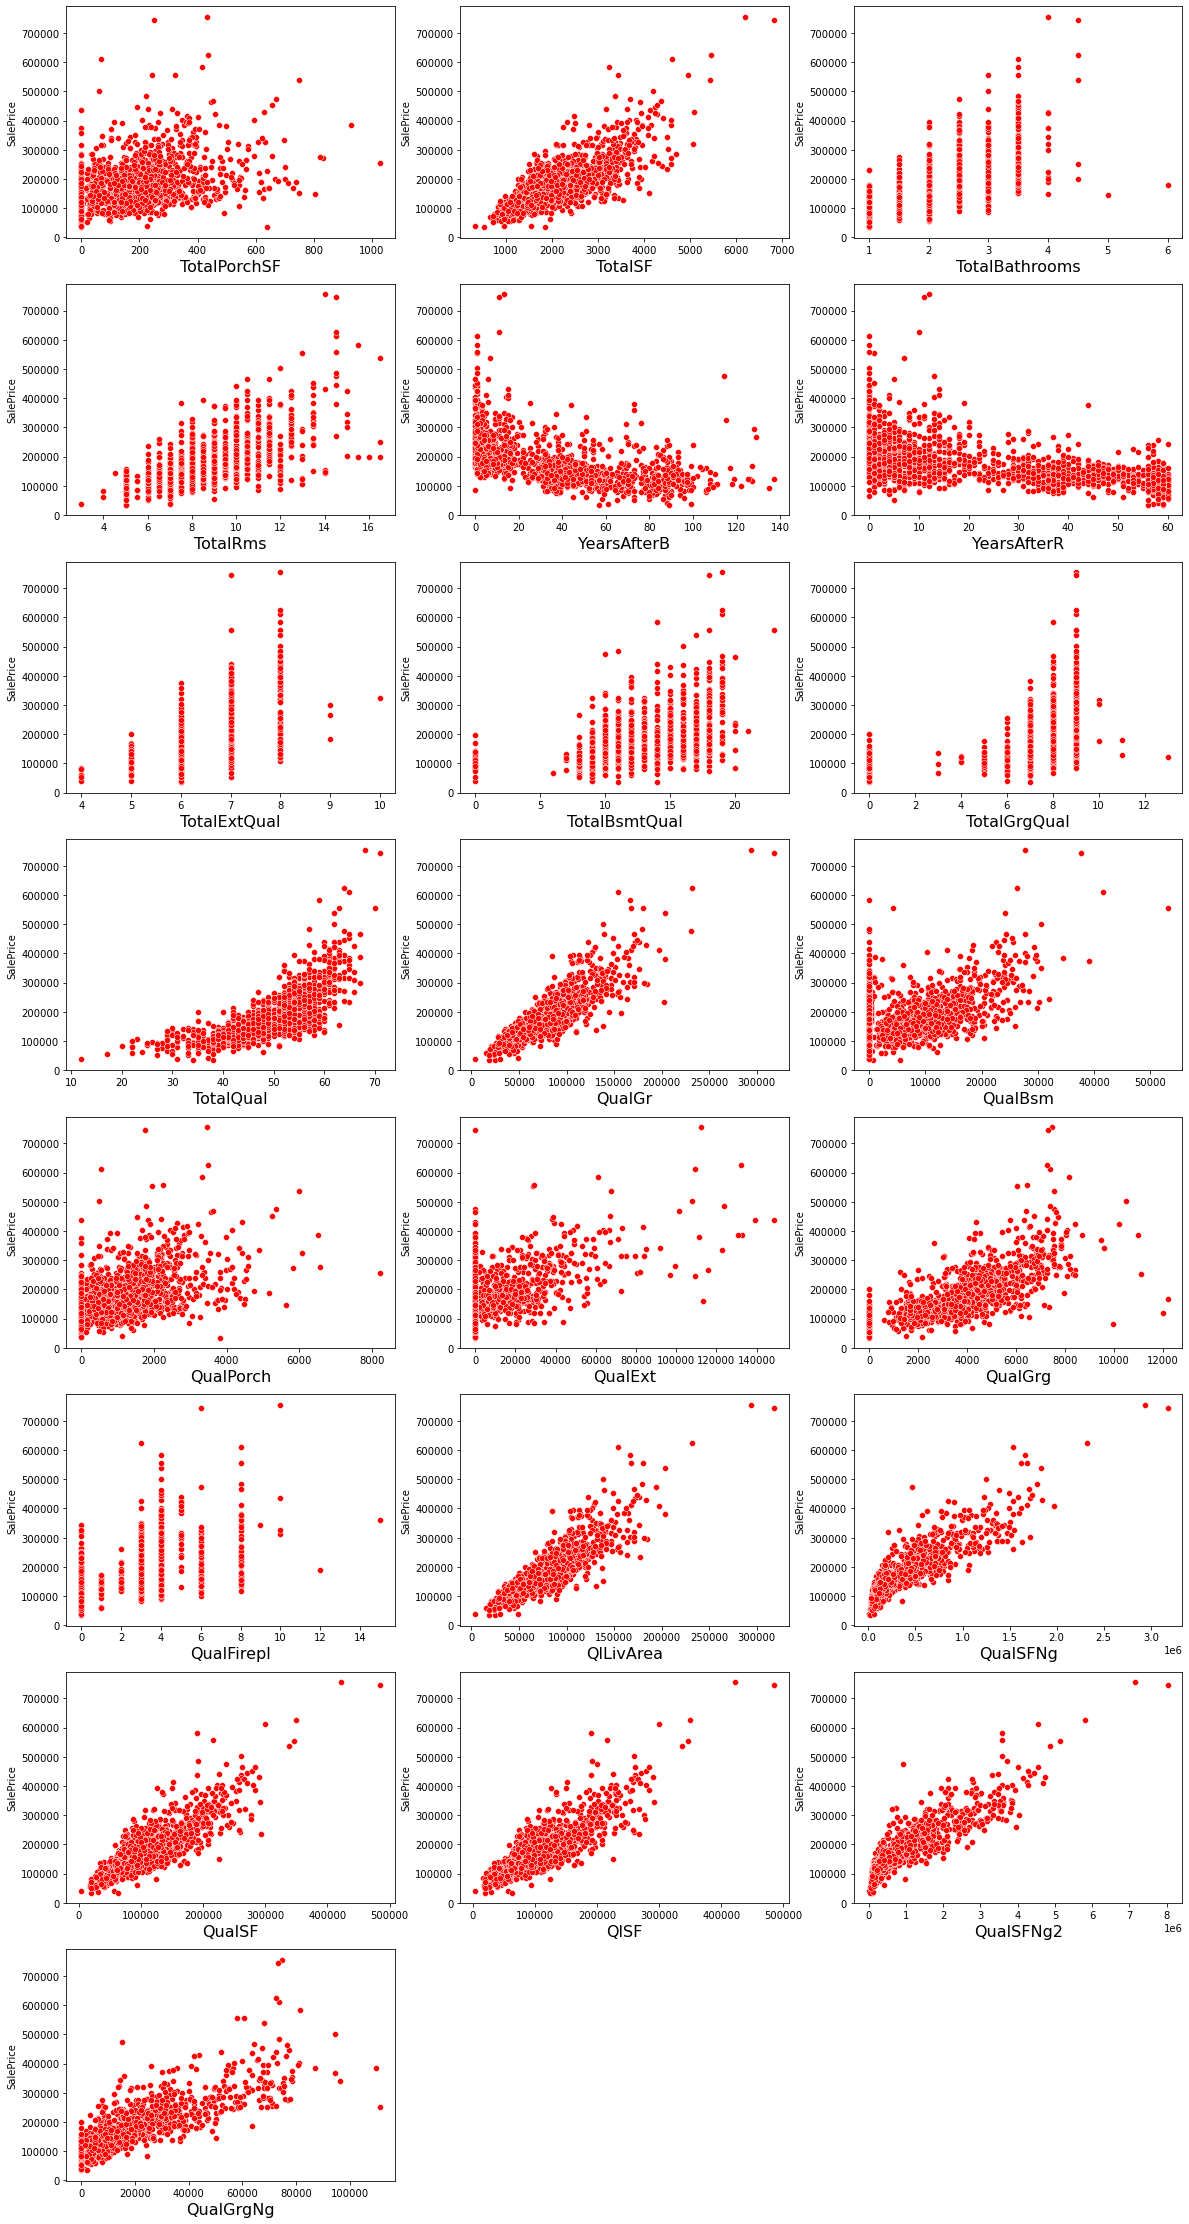

In [274]:
train_cleaned = train_test.xs('train').copy()

plot_grid(pd.concat([train_cleaned[['TotalPorchSF',
                                    'TotalSF',
                                    'TotalBathrooms',
                                    'TotalRms',
                                    'YearsAfterB',
                                    'YearsAfterR',
                                    'TotalExtQual',
                                    'TotalBsmtQual',
                                    'TotalGrgQual',
                                    'TotalQual',
                                    'QualGr',
                                    'QualBsm',
                                    'QualPorch',
                                    'QualExt',
                                    'QualGrg',
                                    'QualFirepl',
                                    'QlLivArea',
                                    'QualSFNg',
                                    'QualSF',
                                    'QlSF',
                                    'QualSFNg2',
                                    'QualGrgNg']], target_cleaned], axis = 1), 
          fig_size = (20, 40), grid_size = (8, 3), plot_type = 'scatterplot', target = 'SalePrice')

In [275]:
train_test.isna().sum().sum()

0

In [276]:
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'Fence', 'TotalSF', 'TotalRms', 'TotalQual', 'TotalPorchSF',
    'TotalBsmtQual', 'TotalGrgQual', 'QualPorch', 'QualFirepl', 'QualGr', 
    'QualGrg', 'QlLivArea', 'QualSFNg', 'QualExt',
    'QualSF', 'QlSF', 'QualSFNg2', 'QualGrgNg', 'ExterCond', 
    'BsmtFinType1', 'BsmtCond', 'BsmtExposure', 'GarageCond',
]

skew_train = np.abs(train_cleaned[skewed].apply(lambda x: skew(x))).sort_values(ascending = False)

high_skew_train = skew_train[skew_train>0.3]

skew_columns_train = high_skew_train.index

test_cleaned = train_test.xs('test').copy()

for i in skew_columns_train:
    lamb = boxcox_normmax(train_cleaned[i] + 1)
    train_cleaned[i] = boxcox1p(train_cleaned[i], lamb)
    test_cleaned[i] = boxcox1p(test_cleaned[i], lamb)
    
high_skew_train

C:\Users\sykua\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\sykua\anaconda3\lib\site-packages\scipy\stats\stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


LotArea          13.168385
3SsnPorch        10.268380
BsmtFinSF2        4.248336
ScreenPorch       4.134952
BsmtCond          3.687035
GarageCond        3.318440
QualExt           3.108850
EnclosedPorch     3.088923
TotalGrgQual      2.542838
MasVnrArea        2.480244
OpenPorchSF       2.332709
QualSFNg2         2.160986
QualSFNg          2.111960
Fence             1.797557
QualGrgNg         1.632616
WoodDeckSF        1.517475
ExterCond         1.392979
QualPorch         1.355659
QualGr            1.330782
QlLivArea         1.292860
QualSF            1.290342
QlSF              1.275590
BsmtExposure      1.111900
TotalPorchSF      1.100909
GrLivArea         1.016466
TotalSF           0.976029
BsmtUnfSF         0.916753
1stFlrSF          0.888121
QualFirepl        0.861897
2ndFlrSF          0.812852
TotalBsmtQual     0.786482
BsmtFinSF1        0.766442
TotalQual         0.607175
TotalRms          0.522068
TotalBsmtSF       0.512345
QualGrg           0.388158
dtype: float64

In [277]:
skew_train = np.abs(train_cleaned[skewed].apply(lambda x: skew(x))).sort_values(ascending = False)
high_skew_train = skew_train[skew_train>0.3]

high_skew_train

3SsnPorch        7.724995
ScreenPorch      3.335763
BsmtFinSF2       2.656037
EnclosedPorch    2.285522
Fence            1.779733
GarageCond       1.669362
ExterCond        1.006474
QualExt          0.951709
MasVnrArea       0.951227
2ndFlrSF         0.887252
WoodDeckSF       0.776952
QualFirepl       0.635440
OpenPorchSF      0.624243
BsmtExposure     0.455332
BsmtFinSF1       0.364440
dtype: float64

In [278]:
train_test_cleaned = pd.concat([train_cleaned, test_cleaned], keys = ['train', 'test'], axis = 0)

train_test = pd.get_dummies(train_test_cleaned)

In [279]:
X_train_full,X_test = train_test.xs('train'), train_test.xs('test')

In [280]:
X_train_full.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,ExteriorSame,TotalPorchSF,TotalSF,TotalBathrooms,TotalRms,YearsAfterB,YearsAfterR,TotalExtQual,TotalBsmtQual,TotalGrgQual,TotalQual,QualGr,QualBsm,QualPorch,QualExt,QualGrg,QualFirepl,QlLivArea,QualSFNg,QualSF,QlSF,QualSFNg2,QualGrgNg,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,HasPorch,HasLotFr,HasFence,WasRemod,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,10.244003,2,5,7,5,2003,2003,9,9,20.109636,2.118565,16.638580,0.660847,6,188.760789,0.0,30.381603,521.751296,1,6.646563,1298.865043,10.202302,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,15.458312,2,0.000000,12.258494,0.00000,0.0,0.0,0.0,1,20.340929,15.783161,3.5,3.347646,5,5,7,61.786101,325.707041,1666.555287,48.045529,10590.0,65.052068,134.444763,2135.700061,0.000000,51.849417,22.316437,71.329349,82.524030,27.084667,178.437915,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,10.407227,2,7,6,8,1976,1976,5,3,0.000000,2.118565,16.638580,1.442340,5,241.908213,0.0,44.801892,744.004993,1,7.021816,0.000000,9.655707,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,15.458312,2,63.483983,0.000000,0.00000,0.0,0.0,0.0,1,58.356520,15.870150,2.5,2.890572,31,31,6,75.411852,325.707041,2004.820362,45.728489,16626.0,158.431239,0.000000,1823.678710,2.568867,49.263456,22.655664,73.542144,85.235452,28.215220,191.651594,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68

In [281]:
y_train_full = np.log1p(target_cleaned)

In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X_train_full, y_train_full, random_state = 0)
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(train_X, train_y)

preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, preds))

0.09054090105164082


In [283]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000,num = 10 )]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10,110, num = 11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = forest_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
rf_random.fit(X_train_full, y_train_full)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [284]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [285]:
best_rf = rf_random.best_estimator_
best_rf.fit(train_X,train_y)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400,
                      random_state=1)

In [288]:
predictions = np.floor(np.expm1(best_rf.predict(X_test)))


0.08701622436508537


submission = pd.DataFrame({'Id': (X_test.set_index('Id').index), 'SalePrice': predictions})
submission.to_csv('submission.csv', index = False)

In [299]:
X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,ExteriorSame,TotalPorchSF,TotalSF,TotalBathrooms,TotalRms,YearsAfterB,YearsAfterR,TotalExtQual,TotalBsmtQual,TotalGrgQual,TotalQual,QualGr,QualBsm,QualPorch,QualExt,QualGrg,QualFirepl,QlLivArea,QualSFNg,QualSF,QlSF,QualSFNg2,QualGrgNg,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,HasPorch,HasLotFr,HasFence,WasRemod,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,10.652792,2,3,5,6,1961,1961,9,9,0.000000,2.118565,16.63858,0.660847,3,137.971682,7.988601,43.453080,536.221429,1,6.690740,0.000000,9.055440,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,15.458312,2,38.085914,0.000000,0.0,0.0,15.712955,2.785357,1,53.367138,14.612356,1.0,2.412472,49,49,6,43.439812,224.465497,1302.734865,40.114627,7344.0,145.614786,0.000000,2452.354826,0.000000,43.021128,19.010646,63.171145,72.576094,23.600999,152.285023,0,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,10.917652,2,3,6,6,1958,1958,5,3,15.083112,2.118565,16.63858,0.660847,5,231.485811,0.000000,55.566121,780.027739,1,7.071780,0.000000,9.747828,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,15.458312,2,76.449305,9.219761,0.0,0.0,0.000000,0.000000,1,74.033146,16.067414,1.5,2.712820,52,52,6,49.268293,224.465497,1302.734865,44.019621,11999.0,198.408773,71.470838,1138.884759,0.000000,47.359730,19.994673,70.517604,81.530735,24.874785,104.313754,0,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [303]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [300]:
def get_best_parameters(model, parameters, cv, search):
    if (search == 'grid'):
        grid = GridSearchCV(model, parameters, cv = cv, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
    
    elif(search == 'randomized'):
        grid = RandomizedSearchCV(model, param_distributions = parameters, n_iter = 100, cv = cv,scoring = 'neg_root_mean_squared_error', n_jobs = -1)
    grid.fit(X_train_full, y_train_full)
    
    return str(grid.best_params_)

In [301]:
svr_params = {
    'svr__C' : [10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16,],
    'svr__gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007],
}

In [305]:
svr = make_pipeline(StandardScaler(),SVR())
svr_best = get_best_parameters(svr, svr_params, cv = 10, search = 'grid')

best_parameters = pd.DataFrame(columns = ['Model_name', "Best_parameters"])

for i in range(len(estimators)):
    best_parameters.loc[i,'Model_name']= labels[i]
    if (labels[i] in ['XGBoost', 'LightGBM', 'GBR', 'CBR']):
        best_paramters.loc[i, 'Best_parameters'] = get_best_paramters(estimators[i], cv = 10, search = 'randomized')
    else:
        best_parameters.loc[i, 'Best_parameters'] = get_best_parameters(estimators[i], estimators_params[i], cv = 10, search = 'grid')

In [306]:
svr_best

"{'svr__C': 10.5, 'svr__gamma': 0.0001}"

In [313]:
svr_best = make_pipeline(StandardScaler(), SVR(C=21, gamma = 0.0001, epsilon = 0.0099))

In [314]:
svr_best.fit(train_X,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=10.5, epsilon=0.0099, gamma=0.0001))])

In [315]:
preds = svr_best.predict(val_X)
print(mean_absolute_error(val_y, preds))

0.07671978871397599


In [312]:
predictions = np.floor(np.expm1(svr_best.predict(X_test)))
submission = pd.DataFrame({'Id': (X_test.set_index('Id').index), 'SalePrice': predictions})
submission.to_csv('submission.csv', index = False)

In [ ]:
0.07587461925875967